# Bosques Aleatorios

In [1]:
# MOdulos basicos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aprendizaje automatico
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Datos
from sklearn.datasets import fetch_openml
elec_data = fetch_openml(name = "electricity", version = 1, as_frame=True, parser = "auto")
df = elec_data.frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       45312 non-null  float64 
 1   day        45312 non-null  category
 2   period     45312 non-null  float64 
 3   nswprice   45312 non-null  float64 
 4   nswdemand  45312 non-null  float64 
 5   vicprice   45312 non-null  float64 
 6   vicdemand  45312 non-null  float64 
 7   transfer   45312 non-null  float64 
 8   class      45312 non-null  category
dtypes: category(2), float64(7)
memory usage: 2.5 MB


<Axes: xlabel='class'>

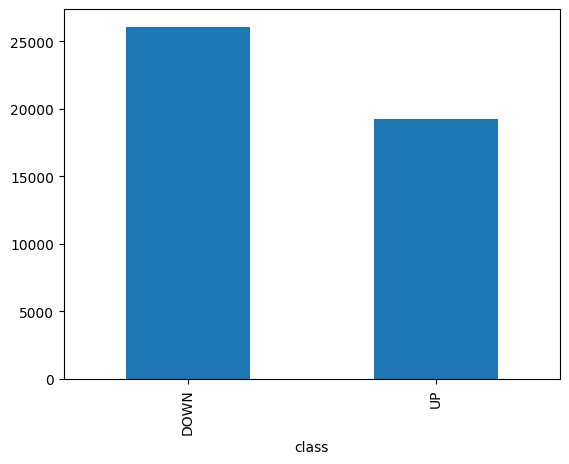

In [4]:
# Distribucion de la variable dependiente : class
df["class"].value_counts().plot(kind = "bar")

In [10]:
# MOdelos base

# Definamos las variables independientes (X) y la variable dependiente (y)
y = df["class"]
X = df.drop(["class"], axis = 1)

# Particionamiento de los datos
X_train, X_test, ytrain, ytest = train_test_split(X,y,train_size=0.85)

# COnsideremos un par de modelos base :
  # Regresion Logistica
  # Bosque aleatorio
reglog_base_model = LogisticRegression()
rf_base_model = RandomForestClassifier()

# Ajustamos cada una de las clases con el subconjunto de datos de entrenamiento
reglog_base_model.fit(X_train, ytrain)
rf_base_model.fit(X_train, ytrain)

# Construyamos pronosticos con X_test
X_test.day = X_test.day.astype("int")
y_pred_reglog = reglog_base_model.predict(X_test)
y_pred_rf = rf_base_model.predict(X_test)

# Calculamos los KPI
acc_reglog_base = metrics.accuracy_score(ytest, y_pred_reglog)
acc_rf_base = metrics.accuracy_score(ytest, y_pred_rf)

# Mostremos los resultados
print("""
Accuracy (Base)
  Regresion LOgistica : %f
  Bosque Aleatorio : %f
""" %(acc_reglog_base, acc_rf_base))



Accuracy (Base)
  Regresion LOgistica : 0.745329
  Bosque Aleatorio : 0.909666

